# Setup

## Parameters

In [1]:
# Default Parameters
notebook_depth = 1
dataset_collections_path = '/home/lietk12/Projects/mp/vent4us/vent-data/'
dataset_collection_name = '20200413 solenoid pinch valve only'
dataset_name = 'A_RR=30, Vt = 300, PEEP = [5,10,15], 10 psi, flow rate = 40slm'
data_name = '2020-04-13 22-16-20.217561'
output_name = 't50-70'
start_time = 50
end_time = 70

In [2]:
# Parameters
notebook_depth = 3
dataset_collections_path = "/home/lietk12/Projects/mp/vent4us/vent-data/"
dataset_collection_name = "20200413 solenoid pinch valve only"
dataset_name = "B_RR=30, Vt = [200,300,400,500], PEEP = 5"
data_name = "2020-04-13 23-33-13.609941"
output_name = "Series2_RR30_Vt500_PEEP5"
start_time = 321.75
end_time = 341.75


## Imports

In [3]:
import pathlib

### Plotting

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### Analysis

In [5]:
import project_path
project_path.add_parent(notebook_depth) # make local ventplotting package available

from ventplotting.analysis import VentAnalyzer
from ventplotting.utilities import paths
from ventplotting.datasets import organization
from ventplotting.plotting import plot
from ventplotting.plotting import measurements as mplot
from ventplotting.plotting import settings as splot

### Notebook

In [6]:
%load_ext autoreload
import logging

import scrapbook as sb

import IPython.display as ipd
from ventplotting.notebooks.display import print_md

## Basic Configuration

### Plotting

In [7]:
%autoreload

plt.style.use('bmh')
plot.use_helvetica()
mpl.rc(
    'figure',
    dpi=120,
    figsize=(8, 6.1)
)
mpl.rc('savefig', dpi=300, transparent=True, bbox='tight')

### Analysis

In [8]:
dataset_path = organization.dataset_path(
    dataset_name, dataset_collection_name, collections_dir=dataset_collections_path
)
data_title = pathlib.Path(dataset_name) / data_name

### Logging

In [9]:
logger = logging.getLogger('ventplotting')
logger.addHandler(logging.StreamHandler())
logger.setLevel(logging.INFO)

# Data

In [10]:
data_path = paths.csv_name_to_path(data_name, dir=dataset_path)

# Basic Analysis

## Analysis

In [11]:
analysis = VentAnalyzer()
analysis.load_data(data_name, dataset_path)

## Raw Data

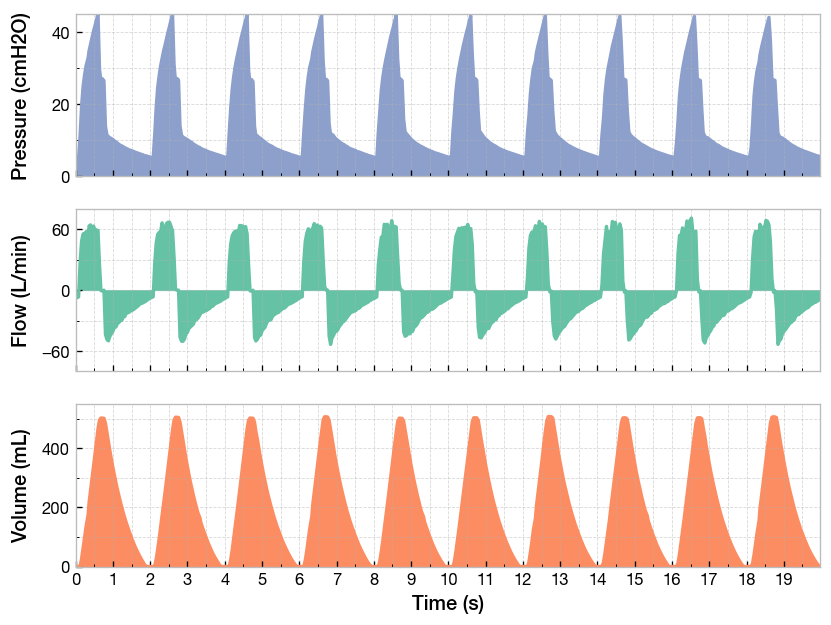

In [12]:
%autoreload

results = mplot.make_measurements_fig(
    analysis, data_title,
    fig_maker=mplot.make_fig,
    kwargs_plot_measurements={'start_time': start_time, 'end_time': end_time, 'realign_time': True}
)

In [13]:
results[0].savefig('{}.png'.format(output_name), dpi=300)
results[0].savefig('{}.pdf'.format(output_name), dpi=300)

'HelveticaNeueLTStd_Md.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


'HelveticaNeueLTStd_Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


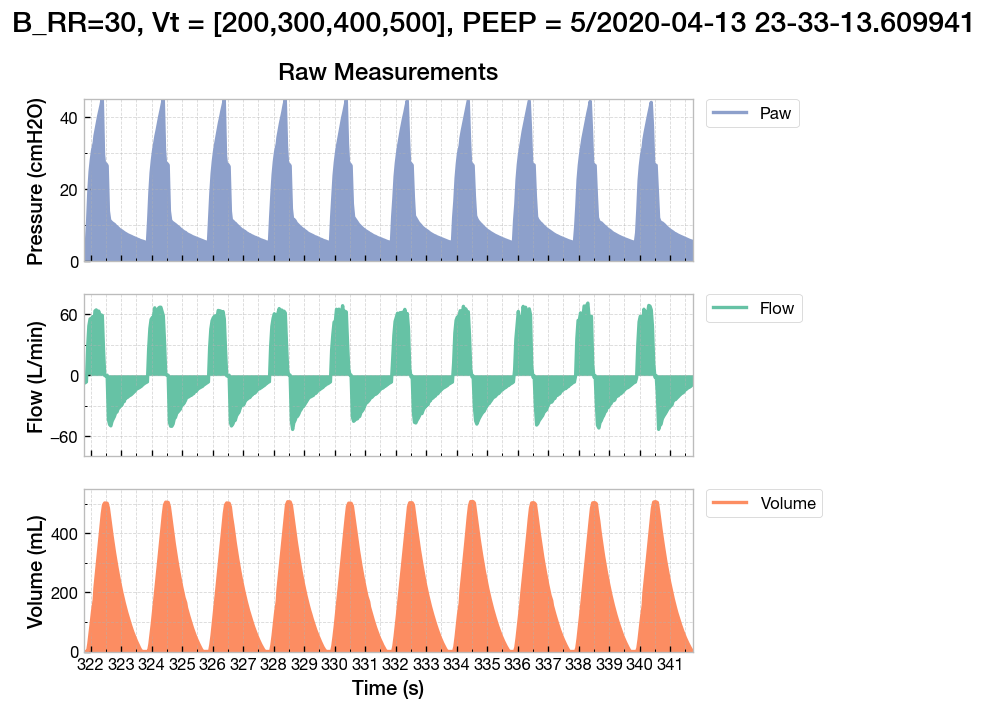

In [14]:
%autoreload

results = mplot.make_measurements_fig(
    analysis, data_title,
    kwargs_plot_measurements={'start_time': start_time, 'end_time': end_time}
)

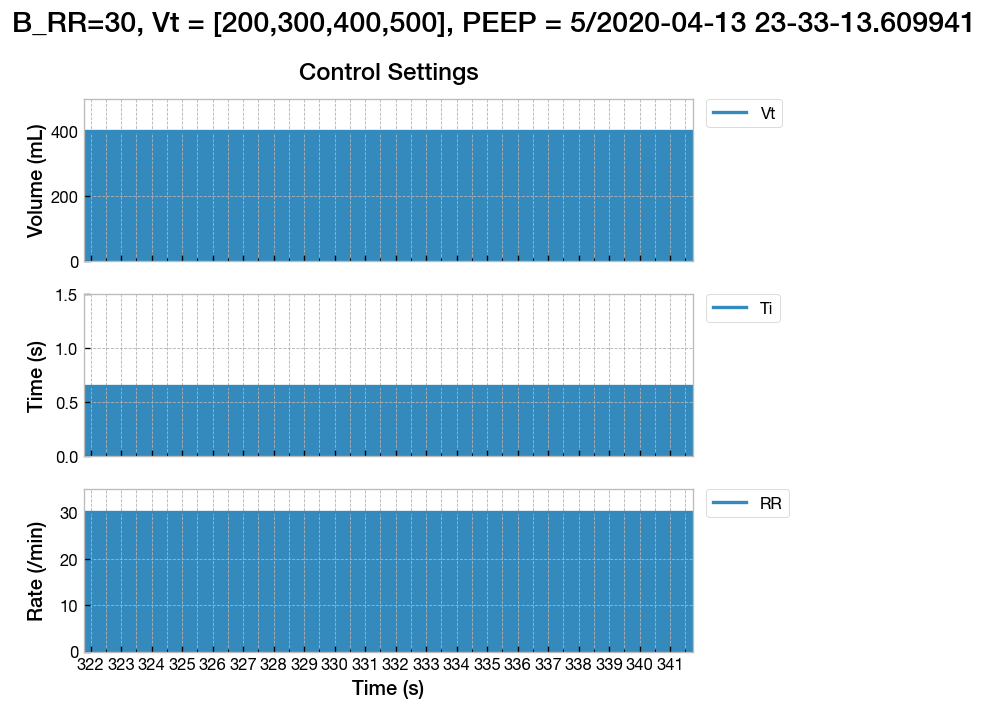

In [15]:
%autoreload

results = splot.make_settings_fig(
    analysis, data_title,
    kwargs_plot_settings={'start_time': start_time, 'end_time': end_time}
)